# Exercise 1
## Authors: E. Vercesi; A. Dei Rossi, S. Huber*, L. Scarciglia

This Notebook is a guideline for Exercise 1.

Exercises marked with a (*) are a bit more challenging.

## Lists
Lists are one of the fundamental data structures in Python. They are used to store ordered collections of items. 

Given the following list (of fruits), learn how to 
1. Access elements: print the first and last element (what is the index of the first element? What is index -1?).
2. Modify elements (e.g, change the third element "cherry" to "pineapple").
3. Get the length of the list.
4. Add one element ("blueberry") at the end.
5. Remove one element ("banana"). Take care of what functions [`pop`](https://www.w3schools.com/python/ref_list_pop.asp) or [`remove`](https://www.w3schools.com/python/ref_list_remove.asp) return and what happens to the original list. What is the meaning of *in-place* method?
6. Learn about the meaning of slicing, then slice your list (get all elements in between index 1 and 3 inclusive).
7. (*) Learn about the meaning of [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) and filter your list of fruits by keeping only fruits starting with "a".

In [2]:
fruits = ["apple", "banana", "cherry", "orange", "avocado"]

## 1: print first and last element
print(fruits[0])
## 2: "cherry" -> "pineapple"
fruits[2] = "pineapple"
## 3: length
len(fruits)
## 4: add "blueberry" at the end
fruits.append("blueberry")
## 5: remove "banana"
fruits.remove("banana")
## 6: slicing: get elements between index 1 and 3 inclusive
print(fruits[1:4])
## 7: list comprehension: filter fruits that start with "a"
fruits_starting_with_a = [fruit for fruit in fruits if fruit.startswith('a')]
print(fruits_starting_with_a)

apple
['pineapple', 'orange', 'avocado']
['apple', 'avocado']


## Numpy
NumPy is a fundamental Python library for numerical and scientific computing. It provides support for working with large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to operate on these arrays efficiently. 
In this part, we will start learning some numpy basics. Before continuing, make sure you have numpy installed in your virtual environment. If not, install it using Conda or Pip by typing in your terminal `conda/pip install numpy`.

In [3]:
import numpy as np
np.random.seed(42)

Question: what is the seed? What is it used for? Solution: see [here](https://medium.com/@debanjana.bhattacharyya9818/numpy-random-seed-101-explained-2e96ee3fd90b).

For fun: why is the seed often set at [42](https://www.youtube.com/watch?v=aboZctrHfK8)? ;)

### Create numpy arrays

Create numpy arrays out of:
- list (And try to change the value of the element in position [1, 1] from 5 to 10)
- tuple
- (*) set

and print the shape and the `dtype` of the arrays. Do you notice anything unexpected? .

In [4]:
## 1: list
my_list = [[1, 2, 3], [4, 5, 6]]
np_list = np.array(my_list)
np_list[1][1] = 10
print(np_list)

## 2: tuple
my_tuple = (1, 2, 3)
np_tuple = np.array(my_tuple)
print(np_tuple)

## 3: set
my_set = {1, 2, 3}
np.array(my_set)

[[ 1  2  3]
 [ 4 10  6]]
[1 2 3]


array({1, 2, 3}, dtype=object)

Check functions [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange) and [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and create vectors of size (3, 4) ([`np.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)) with values from 0 to 11 using both functions.  

In [5]:
# np.arange
vectors = np.arange(12).reshape(3,4)
# np.linspace
np.linspace(0, 11, num=12, dtype=np.int16).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int16)

### Slicing

Take the above array of dimension (3, 4), and access (see [slicing](https://numpy.org/doc/stable/user/basics.indexing.html)):
1) element in position [1,2].
2) the third row.
3) the third column.
4) the 2x2 sub-matrix ranging in between the second and third row and first and second column.

In [6]:
## 1: access element
print(vectors[1,2])
## 2: access row
print(vectors[2])
## 3: access column
print(vectors[..., 2])
## 4: sub-matrix
rows = np.array([1,2], dtype=np.intp)
columns = np.array([0,1], dtype=np.intp)
print(vectors[rows[:, np.newaxis], columns])

6
[ 8  9 10 11]
[ 2  6 10]
[[4 5]
 [8 9]]


### Random arrays
Create random multidimensional arrays and inspect their shape. Try different combinations of dimensions and different distributions (normal, uniform)

1) Create a random array of size 4 of [uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) floating point numbers in the interval [0, 1).
2) Create a random array of size (3, 2) of uniform floating point numbers in the interval [0, 5).
3) Create a random array of size (2, 1, 2) of integers in the interval [10, 20].
4) Create a random array of size 10 over the [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) distribution, mean 3 and std dev 2.

In [7]:
## 1: 
np.random.rand(4)
## 2: 
np.random.uniform(0,5,(3,2))
## 3:
np.random.randint(10,20, (2,1,2))
## 4:
rng = np.random.default_rng(seed=42)
rng.normal(loc=3, scale=2, size=10)

array([ 3.60943416,  0.92003179,  4.50090239,  4.88112943, -0.90207038,
        0.39564099,  3.25568081,  2.36751482,  2.96639768,  1.29391214])

### Copy arrays

Please have a look at [`np.copy`](https://numpy.org/doc/stable/reference/generated/numpy.copy.html). 
1) Create a vector $v$ of size 3, copy it to a new vector $w$, change one entry of vector $w$ and make sure that $v$ is not affected.
2) What if we wanted to change vector $v$ when changing the entries of $w$? 

In [8]:
## 1: Create vector v, copy it to w, change w and make sure v is unaltered.
v = np.array([1,2,3])
w = np.copy(v)
w[0] = 5
print(v[0] == 1)
## 2: Create vector v, copy it to w, change w and make sure v is altered as well.
v = np.array([1,2,3])
w = v
w[0] = 5
print(v[0] == 5)

True
True


### Element-wise functions and broadcasting

1) Given $v = [1, 2, 3], w = [4, 5, 6]$ compute $v - w$, that is, element-wise subtraction. 

2) What happens if $v = [1, 2]$? 

3) set $\lambda=3$ and perform $\lambda w$. Why can't you use as variable name the word "lambda"?
 
4) (*) And if $v = \begin{bmatrix} 4 & 7 & 6 \\ 5 & 8 & 9 \end{bmatrix}$ (shape (2, 3)) and you want to subtract $w$ to all the rows of $v$? (Read carefully [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)).

5) (*) And if $v = \begin{bmatrix} 4 & 5 \\ 7 & 8 \\ 6 & 9 \end{bmatrix}$ (shape (3, 2)) and you want to subtract $w$ to all the columns of $v$? (See [`np.newaxis`](https://stackoverflow.com/a/41267079), `np.vstack` or `.T` transpose operator).



In [9]:
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])

## 1: Perform v - w using numpy arrays
v1 = v-w

## 2: v is smaller than w, what does v - w do?
v2 = np.array([1, 2])
# v2-w # Will throw an exception

## 3: Multiply all entries of w by lambda = 3.
l = 3
print(w*3)

## 4: v is higher dimensional, subtract w from all the rows of v.
v4 = np.array([[4, 7, 6], [5, 8, 9]])
print(v4 - w)

## 5: v is higher dimensional, subtract w from all the columns of v.
v5 = np.array([[4, 5], [7, 8], [6, 9]])
print((v5.T - w).T)
print(v5-w[:, np.newaxis])
print(v5-np.vstack(w))

[12 15 18]
[[0 2 0]
 [1 3 3]]
[[0 1]
 [2 3]
 [0 3]]
[[0 1]
 [2 3]
 [0 3]]
[[0 1]
 [2 3]
 [0 3]]


### Max, min, sum, along different axis

1) Get the max value in the matrix $v = \begin{bmatrix} 1 & 5 & 3 \\ 3 & 4 & 7 \end{bmatrix}$.
2) (*) Get the max value in the matrix $v$ along the columns (see [axis](https://www.pythonpool.com/numpy-axis/)). Predict the shape of the result vector.
3) Get the max value in the matrix $v$ along the rows. Predict the shape of the result vector.
4) (*) Create a random array of shape (2, 3, 4) and get the min along axis 1. Predict the shape of the result and understand what is going on.



In [10]:
v = np.array([[1, 5, 3], [3, 4, 7]])

## 1: get max value.
print(v.max())
print(v.max().shape)
## 2: get max value along the columns.
print(v.max(axis=0))
## 3: get the max value along the rows.
print(v.max(axis=1))
print(v.max(axis=1).shape)
## 4: Create a random array of shape (2, 3, 4) and get the min along axis = 1. Predict the shape of the output matrix.
r = np.random.randint(0,20,(2,3,4))
print(r)
r_min = r.min(axis=1)
print(f"r shape: {r_min.shape}")
print(f"r matrix: \n{r_min}")
print("--------------------")
print(r.min(axis=(1,2)))

7
()
[3 5 7]
[5 7]
(2,)
[[[11  5  1  0]
  [11 11 16  9]
  [15 14 14 18]]

 [[11 19  2  4]
  [18  6  8  6]
  [17  3 13 17]]]
r shape: (2, 4)
r matrix: 
[[11  5  1  0]
 [11  3  2  4]]
--------------------
[0 2]


### The value of the axis tells us which dimension will be collapsed (aka removed).

In the case of shape (2,3,4),
- `min(axis=0)` -> (3,4) 
- `min(axis=1)` -> (2,4)
- `min(axis=2)` -> (2,3)
- `min(axis=(1,2))` -> (2,)

### [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html), [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), [`@`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) and `*`

Learn the difference between these operands. (Keep in mind that `np.dot` does not get used frequently for high dimensional vectors).

1. Take the dot product between two integer random vectors of size 3. Can you do it in multiple ways? In case you can, check that the result is the same.
2. Take the element-wise product (Hadamard product) between two integer random matrices of size (4, 2). Predict the shape of the result.
3. Take the dot product between an integer random matrix of size (3, 2) and an integer random vector of size (2). Predict the shape of the result. Can you do it in multiple ways? In case you can, check that the result is the same.
4. Take the dot product between an integer random matrix of size (4, 3) and another integer random matrix of size (3, 2). Predict the shape of the result. Can you do it in multiple ways? In case you can, check that the result is the same.
5. (*) (Optional, again `np.dot` is not frequently used for high dimensional vectors) see the difference between the `np.dot` and `np.matmul` of two integer random matrices of shape (2, 3, 3). Predict the shape of the two results. 


In [11]:
## 1: take dot product of 1 dimensional vectors.
a = np.random.randint(0,5,size=3)
b = np.random.randint(0,5,size=3)
print(f'a: {a} \t b: {b}' )
print('np.dot:', np.dot(a, b))
print('np.matmul:', np.matmul(a, b))
print('a @ b:', a @ b)
print('np.dot == np.matmul:', np.dot(a, b) == np.matmul(a, b))
print('np.dot == a @ b:', np.dot(a, b) == a @ b)
print('--------------------------------')
## 2: take the Hadamard product of two matrices.
a = np.random.randint(0,10,size=(4,2))
b = np.random.randint(11,20,size=(4,2))
print(f'a: {a} \nb: {b}')
print('a * b:\n', a * b)
print('shape:\n', (a * b).shape)
print('--------------------------------')
## 3: take dot product matrix-vector.
a = np.random.randint(0,5,size=(3,2))
b = np.random.randint(0,5,size=2)
print(f'a:\n{a} \nb: {b}' )
print('np.dot:', np.dot(a, b))
print('np.matmul:', np.matmul(a, b))
print('np.dot == np.matmul:', np.dot(a, b) == np.matmul(a, b))
print('--------------------------------')
## 4: take dot product matrix-matrix.
a = np.random.randint(0,5,size=(4,3))
b = np.random.randint(0,5,size=(3,2))
print(f'a:\n{a} \nb:\n {b}' )
print('np.dot:\n', np.dot(a, b))
print('np.matmul:\n', np.matmul(a, b))
print('np.dot == np.matmul:', np.dot(a, b) == np.matmul(a, b))
## 5: np.dot vs np.matmul. 
a = np.random.randint(0,5,size=(2,3,3))
b = np.random.randint(0,5,size=(2,3,3))
print(f'a:\n{a} \nb:\n {b}' )
print('np.dot:\n', np.dot(a, b))
print('np.matmul:\n', np.matmul(a, b))
print('np.dot.shape:' , np.dot(a, b).shape, 'np.matmul.shape:', np.matmul(a, b).shape)

a: [1 0 1] 	 b: [4 1 3]
np.dot: 7
np.matmul: 7
a @ b: 7
np.dot == np.matmul: True
np.dot == a @ b: True
--------------------------------
a: [[6 7]
 [2 0]
 [3 1]
 [7 3]] 
b: [[12 16]
 [16 14]
 [16 12]
 [12 14]]
a * b:
 [[ 72 112]
 [ 32   0]
 [ 48  12]
 [ 84  42]]
shape:
 (4, 2)
--------------------------------
a:
[[3 0]
 [4 4]
 [1 4]] 
b: [1 0]
np.dot: [3 4 1]
np.matmul: [3 4 1]
np.dot == np.matmul: [ True  True  True]
--------------------------------
a:
[[3 3 3]
 [4 0 4]
 [4 0 0]
 [0 0 3]] 
b:
 [[2 2]
 [0 2]
 [2 0]]
np.dot:
 [[12 12]
 [16  8]
 [ 8  8]
 [ 6  0]]
np.matmul:
 [[12 12]
 [16  8]
 [ 8  8]
 [ 6  0]]
np.dot == np.matmul: [[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]
a:
[[[2 4 1]
  [1 0 3]
  [0 3 1]]

 [[0 4 2]
  [3 2 2]
  [0 2 4]]] 
b:
 [[[2 0 4]
  [1 2 0]
  [1 1 3]]

 [[4 2 0]
  [3 4 3]
  [4 4 2]]]
np.dot:
 [[[[ 9  9 11]
   [24 24 14]]

  [[ 5  3 13]
   [16 14  6]]

  [[ 4  7  3]
   [13 16 11]]]


 [[[ 6 10  6]
   [20 24 16]]

  [[10  6 18]
   [26 22 10]]

  [[

### Apply functions to vectors

Define a simple python function that computes $f(x,y) = xy + x + y$ for integer $x,y\in\mathbb{Z}$. 
Use numpy to apply such a function to two vectors of size 3, element by element. 

e.g. $v = [1,2,3]$, $w=[0,3,4]$, $f(v,w) = [1, 11, 19]$

Hint: see [`np.vectorize`](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html)

In [12]:
## Define function f
def f(x: int, y: int) -> int:
    return x*y + x + y

vf = np.vectorize(f)
## Apply function f to vectors v, w element by element
v = np.array([1,2,3])
w = np.array([0,3,4])
print(vf(v, w))

[ 1 11 19]


### Filtering

Create a random vector of integers in the interval [0, 10) of size 10, and filter all elements larger than 4 and less than 8 and set them to 20. Try to do it using both [boolean masks](https://www.programiz.com/python-programming/numpy/boolean-indexing) and [`np.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
## Filter elements in the interval [5, 8) and set them to 20
x = np.random.uniform(0,10,10)
condition = (x > 4) & (x < 8)
## 1: boolean masks.
print('before:', x)
y = x.copy()
y[condition] = 20
print('after:', y)
## 2: np.where.
x = np.where(condition, 20, x)
print('after where:', x)

before: [2.03061225 9.42853571 5.98865466 6.94784933 8.80467839 6.24354048
 2.95633686 1.0549426  4.5653457  2.18440437]
after: [ 2.03061225  9.42853571 20.         20.          8.80467839 20.
  2.95633686  1.0549426  20.          2.18440437]
after where: [ 2.03061225  9.42853571 20.         20.          8.80467839 20.
  2.95633686  1.0549426  20.          2.18440437]


## The curse of dimensionality

In this exercise you are going to experience the "curse of dimensionality": namely, data in a high dimensional space becomes increasingly sparse.

We are going to visualize it graphically by plotting 10 random points in unit hypercubes of increasing dimensions (1, 2, 3).

1) To begin with, let us create a random vector of 10 data points uniformly distributed in the interval [0, 1). Plot this distribution using `matplotlib` see method `plt.scatter`.
In order to scatter points, you need 2-dimensional points (axes $x,y$). In this case, just set the $y$ axis value to 0.

In [14]:
import matplotlib.pyplot as plt

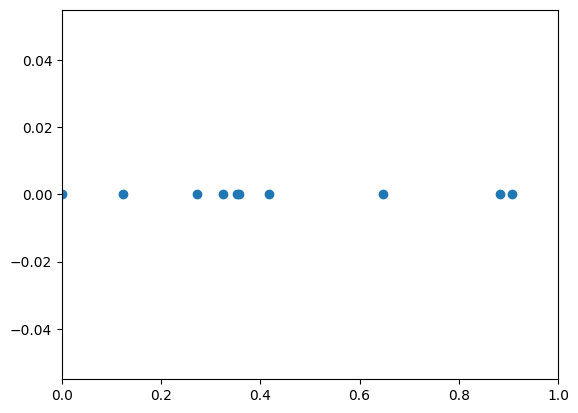

In [15]:
## 1: Create 10 points in 1 dimension, and plot them on a line.

data1d = np.random.rand(10) # Make sure its shape is (10, 1)
plt.scatter(data1d, np.zeros(10))
plt.xlim(0,1)
plt.show()


2) Then, do the same for a 2-dimensional space: create 10 random points in the 2-dimensional unit hypercube (a square), and plot them.

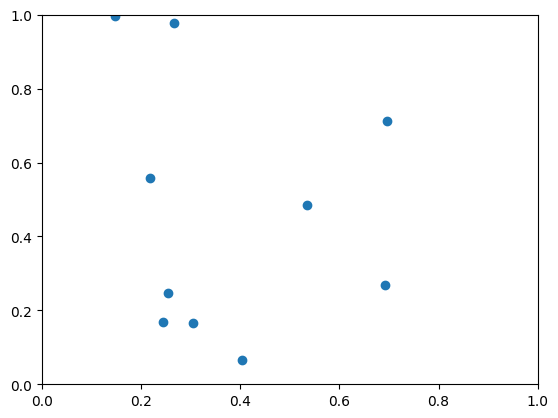

In [16]:
## 2: Create 10 points in 2 dimensions, and plot them in the 2D plane.

data2d = np.random.uniform(0,1,(10,2))  # Make sure its shape is (10, 2)
x = data2d[:,0]
y = data2d[:,1]
plt.scatter(x,y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

What do you notice? Do you think points are more spread out in the 2-dimensional or in the 1-dimensional hypercube?

3) Let us try also with the 3-dimensional space: create 10 random points in the 3-dimensional unit hypercube (a cube), and plot them using [`ax.scatter3D`](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/).

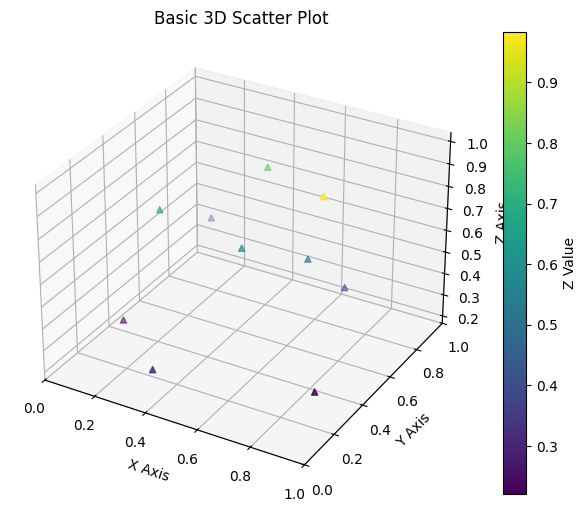

In [17]:
from mpl_toolkits.mplot3d import Axes3D
## 3: Create 10 points in 3D, and plot them in the 3D plane.

data3d = np.random.uniform(0,1,(10,3))  # Make sure its shape is (10, 3)
colors = data3d[:,2]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d') # {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}


sc = ax.scatter3D(data3d[:,0], data3d[:,1], data3d[:,2], c=colors, cmap='viridis', marker='^')
plt.colorbar(sc, ax=ax, label='Z Value')

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Basic 3D Scatter Plot')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.show()


What do you notice? Do you think points are more spread out in the 3-dimensional, 2-dimensional or 1-dimensional hypercube?

Let us try to quantify numerically how distant from each other the points in the three hypercubes are. 

(*) Write a function that, taken a list of 10 $k$-dimensional points (shape (10, $k$), for any $k\in\mathbb{N}$), computes the average pairwise distance between all pairs of points.  

The distance between two $k$-dimensional points $x, y$ is given by the formula $dist(x, y) = \sqrt{\sum_{i=1}^k (x_i - y_i)^2}$, for $x,y\in\mathbb{R}^k$.

The average pairwise distance of a list $v$ of 10 $k$-dimensional points is given by the formula: $\frac{\sum_{i=1}^{9} \sum_{j=i+1}^{10} dist(v_i, v_j)}{10 \choose 2}$. Notice that $v$ has shape (10, $k$), and $v_i, v_j$ have both shape $k$. 

The binomial coefficient ${10 \choose 2} := \frac{10!}{2! (10-2)!}$, and it is nothing but the number of distinct pairs you can make with 10 numbers. You can also write it as: ${10 \choose 2} = \sum_{i=1}^{9} \sum_{j=i+1}^{10} 1$.

Try to use numpy core functions and broadcasting when possible.

In [21]:
def dist(x: np.array, y: np.array) -> float:
    return np.linalg.norm(x-y)

def broadcast_dist(x: np.array, y: np.array) -> float:
    return np.sqrt(np.sum((x-y)**2))

def avg_pairwise_distance(v: np.array) -> float:
    dists = 0
    for i in range(9):
        for j in range(1, 10):
            dists += dist(v[i],v[j])
    distances = np.sum([np.sum([dist(v[i], v[j]) for j in range(1, 10)]) for i in range(9)])
    bin_co = (v.shape[0] - 1)**2
    print(distances)
    return distances/bin_co

def average_pairwise_distance(points):
    n = points.shape[0]
    idx_i, idx_j = np.triu_indices(n, k=1)
    diff = points[idx_i] - points[idx_j]
    distances = np.sqrt(np.sum(diff**2, axis=1))
    avg_distance = np.mean(distances)
    return avg_distance

def alt(v: np.array) -> float:
    m1 = v[:9]
    m2 = v[1:10]
    


Use the above function to compute the average distance between points in `data1d`, between points in `data2d` and between points in `data3d`. Which one is larger?

In [ ]:
print(avg_pairwise_distance(data1d))
#print(average_pairwise_distance(data1d))
print(avg_pairwise_distance(data2d))
print(avg_pairwise_distance(data3d))

26.95187623208895
0.3327392127418389
36.38089360960616
0.4491468346864958
45.007037685263285
0.555642440558806
0.6333691876046644
